# Part 4 of Links and Relationships: Link Rules - Part I

This page is primarily based on the following page at the Circos documentation site:



- [4. Link Rules - Part I](????????????)



That page is found as part number 4 of the ??? part ['Links and Relationships' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 3 by clicking [here &#8592;](Links_Part3.ipynb).



----



5 --- Links and Relationships
=============================

4. Link Rules - Part I
----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/links/rules1/lesson){.clean}]{.active}
[Images](/documentation/tutorials/links/rules1/images){.normal}
[Configuration](/documentation/tutorials/links/rules1/configuration){.normal}
:::

Rules are special blocks within [\<plot\>]{.syn-block} or
[\<link\>]{.syn-block} blocks which redefine how data (e.g. links) are
displayed based on position, value, format or any other property
associated with the data.

The general form is

```ini
# for 2D plots
<plots>
```


```ini
<plot>
```


```ini
...
```


```ini
<rules>
<rule>
...
</rule>
```


```ini
<rule>
...
</rule>
```


```ini
...
```


```ini
</rules>
```


```ini
</plot>
```


```ini
</plots>
```


```ini
# for links
<links>
```


```ini
<link>
```


```ini
...
```


```ini
<rules>
<rule>
...
</rule>
```


```ini
<rule>
...
</rule>
```


```ini
...
```


```ini
</rules>
```


```ini
</link>
```


```ini
</links>
```


Each [\<link\>]{.syn-block} block may have an associated
[\<rules\>]{.syn-block} block, which in turn contains one or more
[\<rule\>]{.syn-block} blocks. Each [\<rule\>]{.syn-block} block
contains a test condition and format parameters. When a link passes the
test condition, the format parameters of the rule block are applied to
the link.

data points are tested independently
------------------------------------

Rules are applied to each data point in your data set independently. The
data point can be a highlight, histogram bar, scatter point or link.
When a rule is being applied to a point, you have access to properties
of the data point, but *not* to other data points. In other words, there
is no *direct* mechanism of adjusting a data point based on its
neighbours. You can hack this by associating a coe(prev) and `next`
parameter with a data point and testing for those

```ini
hs1 0 9 0.25 next=0.5
hs1 10 19 0.5 prev=0.25,next=0.75
hs1 20 29 0.75 prev=0.5,next=1.00
...
```


rule syntax
-----------

Each rule must contain a `condition` parameter which defines the test
applied to the data. Each data point is tested.

### rule condition

The format of the condition is Perl code and is automatically evaluated
(no need for `eval()`). A few helper functions are available to simplify
testing multiple parameters (e.g. `between()`, see below). You can
suffix any numerical value in a condition expression with `kb`, `mb`, or
`gb` to indicate a base pair multiplier.

There are certain keywords that are parsed at runtime and substituted
with values based on the link that is being tested. For example,
individual data point properties are accessible via the `var(FIELD)`
function, where `FIELD` is one of

-   `CHRn` chromosome of span n in the link (e.g. `var(chr1)`)
-   `STARTn` start position of span n in the link (e.g. `var(start2)`)
-   `ENDn` end position of span n in the link (e.g. `var(end2)`)
-   `POSn` middle position of span n in the link (e.g. `var(position1)`)
-   `SIZEn` size of span n in the link (e.g. `var(size1)`)
-   `REVn` returns 1 if the link end is reversed (e.g. start \> end)
-   `INV` returns 1 if the link is inverted (i.e. one of its ends is

```ini
reversed). If both ends are reversed, the link is *not* inverted
```


-   `INTERCHR` returns 1 if the link ends are on different chromosomes,

```ini
otherwise returns 0 (e.g. `var(interchr)`)
```


-   `INTRACHR` returns 1 if the link ends are on the same chromosome,

```ini
otherwise returns 0 (e.g. `var(intrachr)`)
```


The numerical suffix (e.g. `var(start1)` vs `var(start2)`) applies to
links only and is used to test the start or end of the link. Data types
associated with a single coordinate span do not use the suffix (e.g.
`var(start)`).

Examples of conditions are

```ini
condition = var(chr1) eq "hs1"  # link starts on hs1
condition = var(size1) < 1mb    # link start span is shorter than 1Mb
condition = 1                   # always true for any link
```


### rule condition testing

Rules are applied in the following order.

First, any rules that contain the `importance` parameter are applied, in
descending order of `importance`. Second, any rules that do not contain
the `importance` parameter are applied, in order of appearance. The
`importance` parameter allows you to prioritize rules without having to
move their blocks.

When a rule passes (e.g. its `condition` parameter evalutes to true), it
is applied to the data point. At this point, the rule chain may or may
not terminate, depending on the `flow` parameter (see below). By
default, the first rule that passes terminates the rule chain (i.e. no
further rules are applied to the data point and the next data point is
tested).

When a rule fails, the next rule is tested on the data point. This
continues until a rule passes or all rules have been tested.

rule cascade
------------

By default, when a rule passes, it terminates the chain.

```ini
<rule>
# if this rule passes
</rule>
```


```ini
<rule>
# all subsequent rules are not tested
</rule>
```


```ini
...
```


You can change this behaviour by setting the `flow` parameter. If
`flow = continue`, then a rule that passes no longer short-circuits the
cascade. Subsequent rules are tested and if they pass, can overwrite
data point properties.

```ini
<rule>
...
flow = continue # if this rule passes, continue testing
</rule>
```


The `flow` parameter can take on four different values, with an optional
optional `if true` or `if false`.

```ini
# continue testing
flow = continue { if true|false }
# continue testing, but start at top of rule chain
flow = restart  { if true|false }
# stop testing
flow = stop     { if true|false }
# goto rule associated with tag=TAG
flow = goto TAG { if true|false }
```


You can have multiple `flow` parameters for different evantualities.

```ini
<rule>
...
flow = stop if false
flow = goto otherrule if true
</rule>
```


```ini
<rule>
tag = otherrule
...
</rule>
```


A rule may lack a condition if a flow directive exists. You can
short-circuit all rules using

```ini
<rule>
flow = stop
</rule>
```


Use the `goto` form to skip to bypass rules you don\'t want to test.

```ini
<rule>
flow = goto myrule
</rule>
```


```ini
... rules you don't want to use
```


```ini
<rule>
tag = myrule
...
</rule>
```


3-rule example

Here\'s a simple example, where segmental duplication links are
displayed and tested with 3 rules.

The first rule turns off the display of intrachromosomal links by
setting `show=no` when `var(intrachr)` is true.

The second rule colors all links between `hs1` and `hs2` green and makes
them drawn on top of other links, by setting their `z` parameter higher.
Recall that by default `z = 0` for all data points. The
`flow = continue` parameter continues testing other rules, even if this
rule passes.

The final rule colors links between `hs2` and `hs3` blue, makes them
thicker and increases their `z` value further.

```ini
<link>
```


```ini
<link>
```


```ini
file       = data/5/segdup.txt
```


```ini
<rules>
```


```ini
<rule>
condition  = var(intrachr)
show       = no
</rule>
```


```ini
<rule>
condition  = between(hs1,hs2)
color      = green
z          = 10
flow       = continue
</rule>
```


```ini
<rule>
condition  = between(hs2,hs3)
color      = blue
thickness  = 2
z          = 15
</rule>
```


```ini
</rules>
```


```ini
</link>
```


```ini
</links>
```


----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/5/4/

/home/jovyan/circos-tutorials-0.67/tutorials/5/4


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.31s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.32s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/5/4
debuggroup summary 0.32s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.32s loading configuration from file circos.conf
debuggroup summary 0.32s found conf file circos.conf
debuggroup summary 0.47s debug will appear for these features: output,summary
debuggroup summary 0.47s bitmap output image ./circos.png
debuggroup summary 0.47s SVG output image ./circos.svg
debuggroup summary 0.47s parsing karyotype and organizing ideograms
debuggroup summary 0.57s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.57s applying global and local scaling
debuggroup summary 0.57s allocating image, colors and brushes
debuggroup summary 2.53s drawing 4 ideograms of total size 881,626,704
debuggroup summary 2.53s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

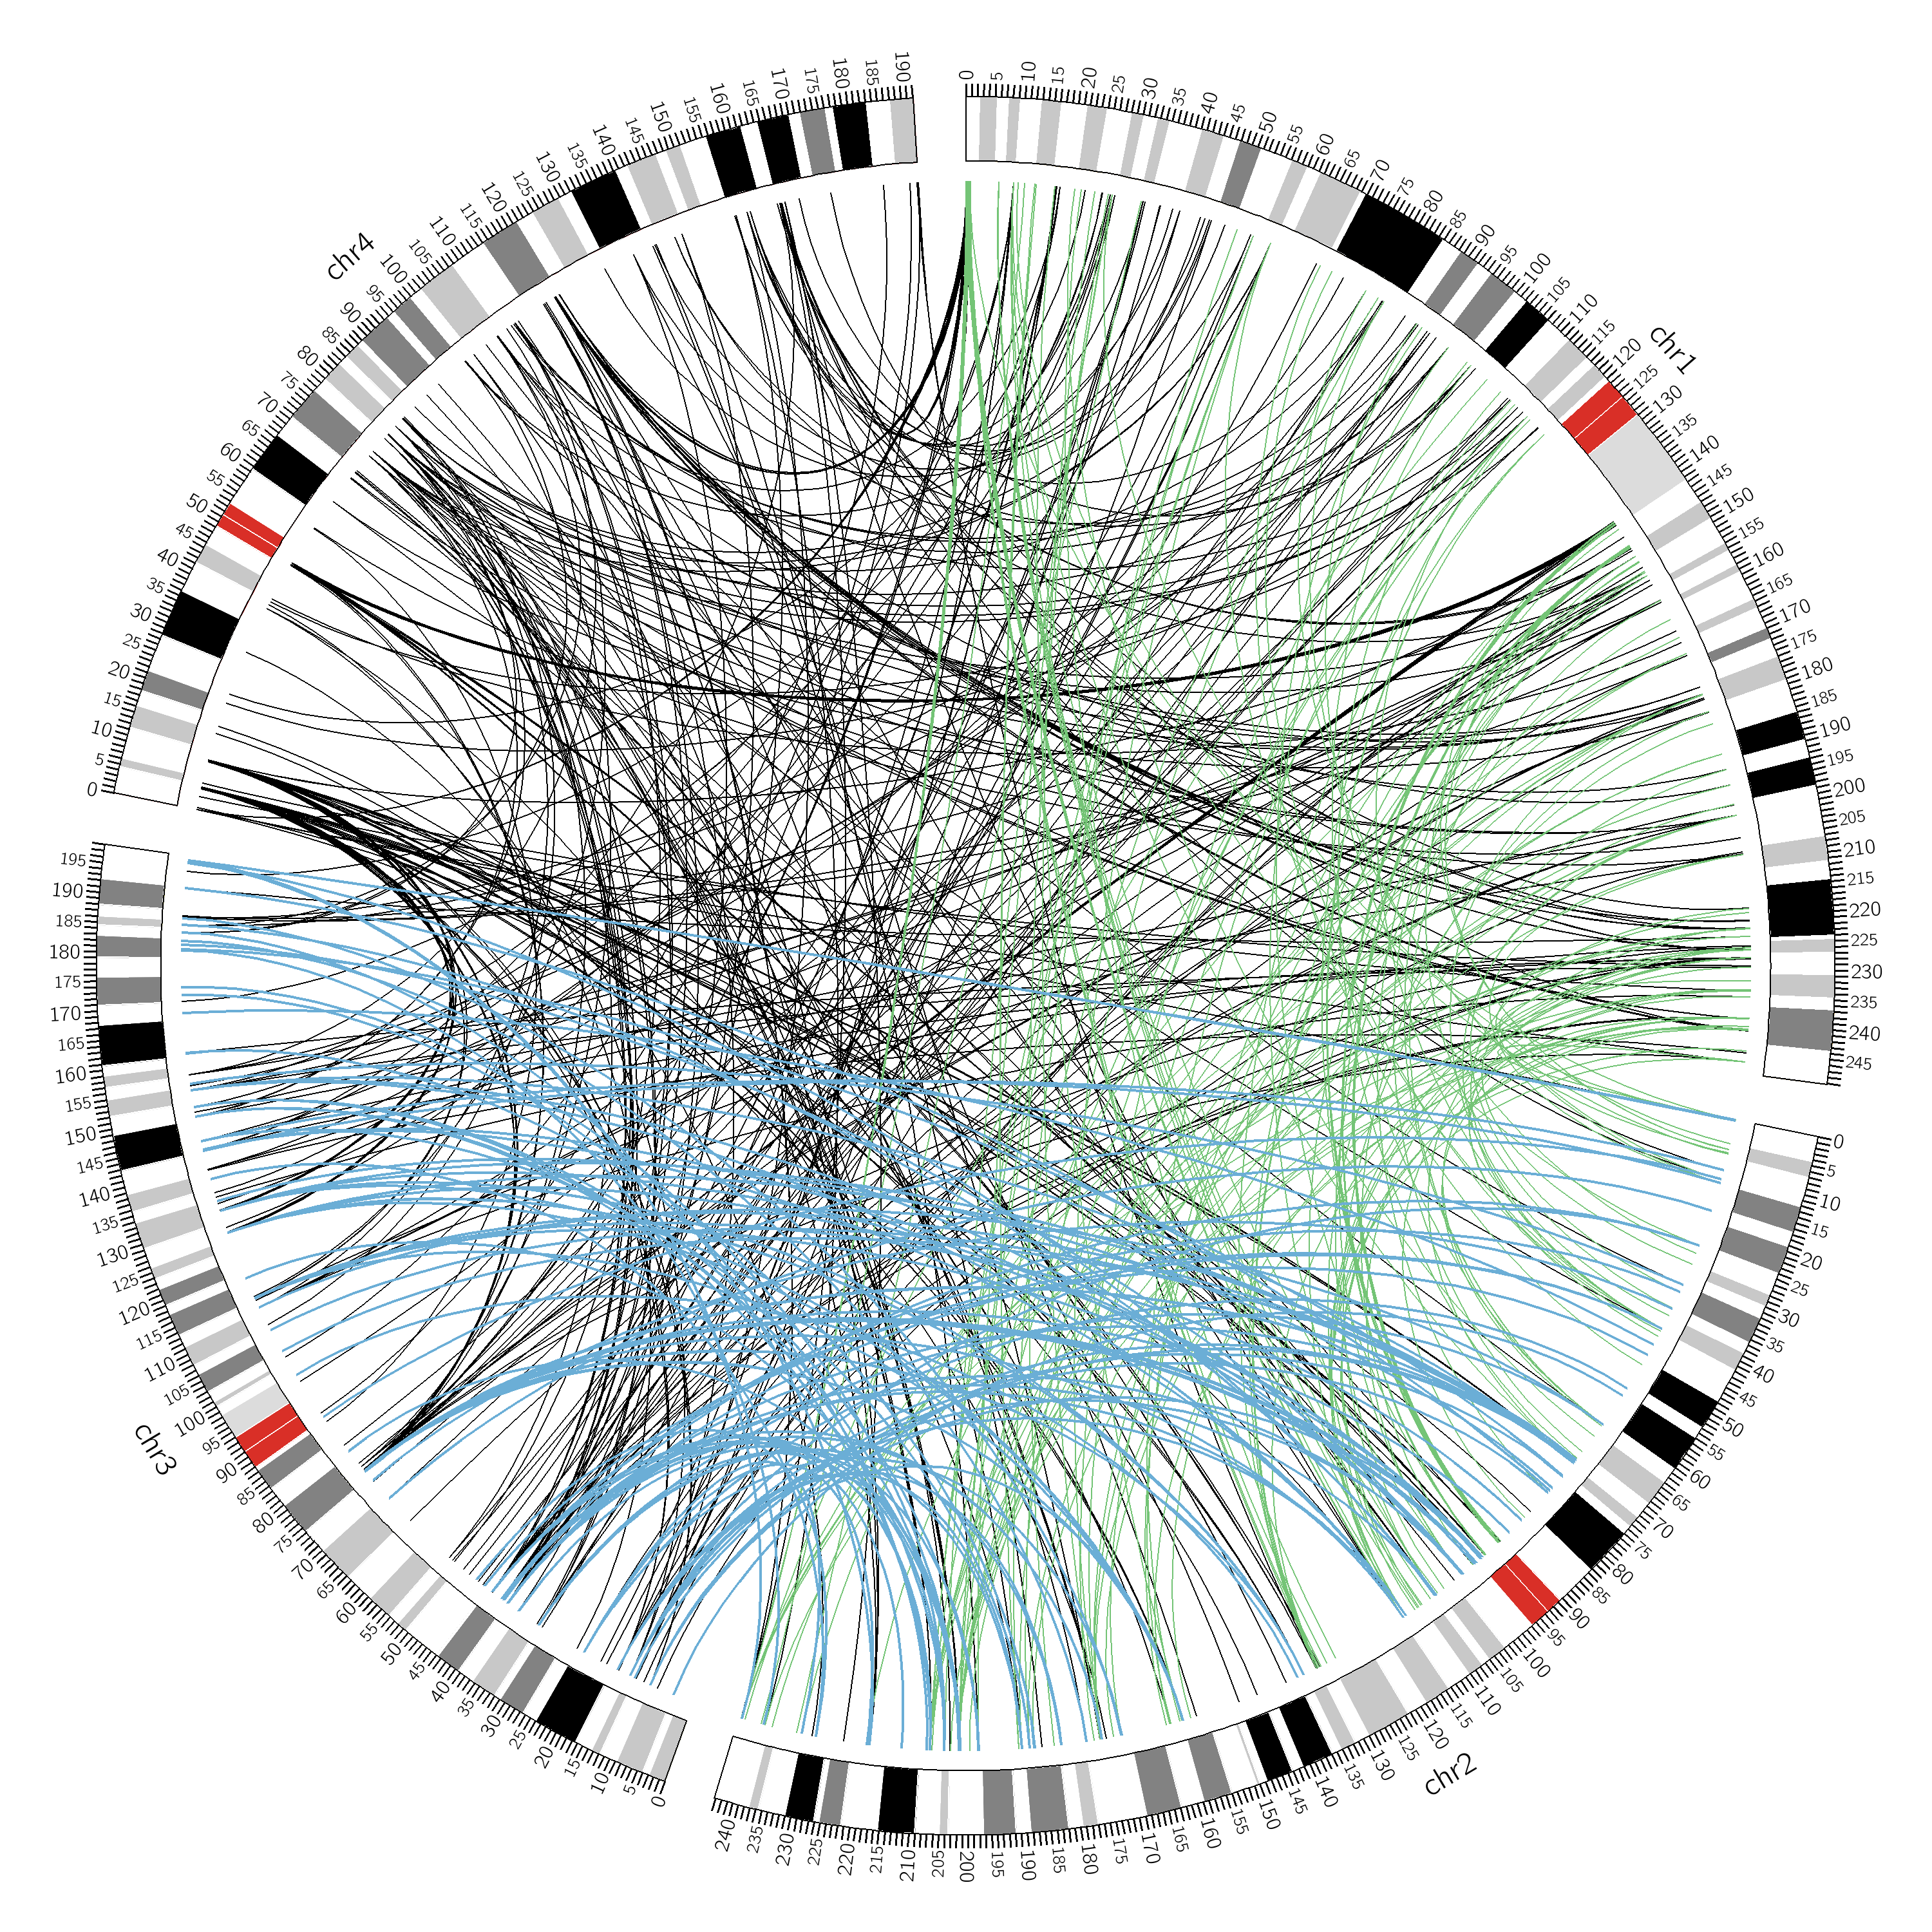

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Links and Relationships series by clicking [here &#10145;](Links_Part5.ipynb).

----